In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings


In [10]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('datos_viajes.csv')


In [11]:
# Mostrar las primeras filas del conjunto de datos para entender su estructura
print("Primeras filas del conjunto de datos:")
print(datos.head())


Primeras filas del conjunto de datos:
   Estación Origen  Estación Destino  Tiempo  Costo Origen Destino
0              NaN               NaN      10  20000      A       B
1              NaN               NaN      15   3000      A       C
2              NaN               NaN       5  10000      B       C
3              NaN               NaN      10  20000      B       D
4              NaN               NaN      20   4000      C       D


In [12]:
# Seleccionar las características relevantes para el clustering
X = datos[['Tiempo', 'Costo']]


In [13]:
# Normalizar las características para asegurar que todas tengan el mismo peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for k in range(1, 8):  # Ajustar el rango a partir del error
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)


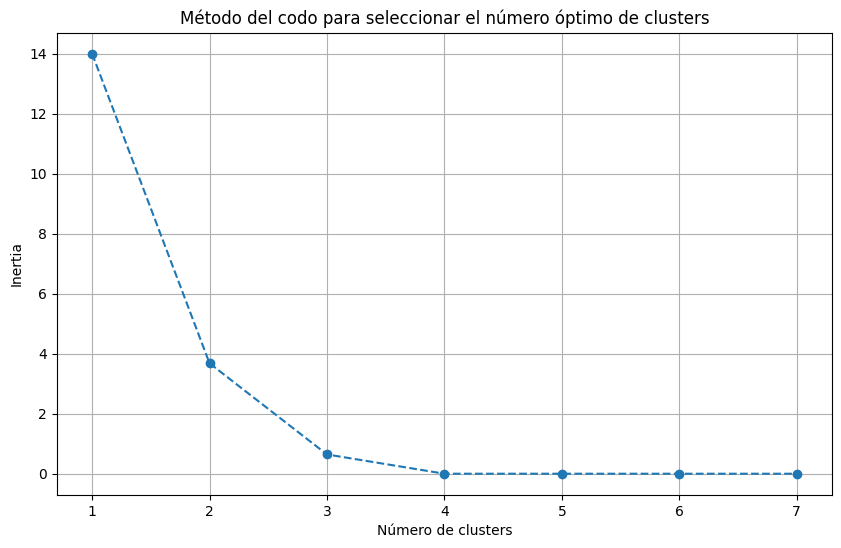

In [15]:
# Visualizar el método del codo para seleccionar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), inertia, marker='o', linestyle='--')  # Ajustar el rango a partir del error
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del codo para seleccionar el número óptimo de clusters')
plt.xticks(range(1, 8))  # Ajustar el rango a partir del error
plt.grid(True)
plt.show()

In [21]:

# Crear y entrenar el modelo de clustering utilizando KMeans
n_clusters = 3  # Número de clusters seleccionado
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Agregar n_init
clusters = kmeans.fit_predict(X_scaled)

In [18]:
# Agregar las etiquetas de los clusters al conjunto de datos
datos['Cluster'] = clusters


In [ ]:
# Mostrar las primeras filas del conjunto de datos con las etiquetas de los clusters
print("\nConjunto de datos con las etiquetas de los clusters:")
print(datos.head())


Conjunto de datos con las etiquetas de los clusters:
   Estación Origen  Estación Destino  Tiempo  Costo Origen Destino  Cluster
0              NaN               NaN      10      2      A       B        2
1              NaN               NaN      15      3      A       C        1
2              NaN               NaN       5      1      B       C        0
3              NaN               NaN      10      2      B       D        2
4              NaN               NaN      20      4      C       D        1


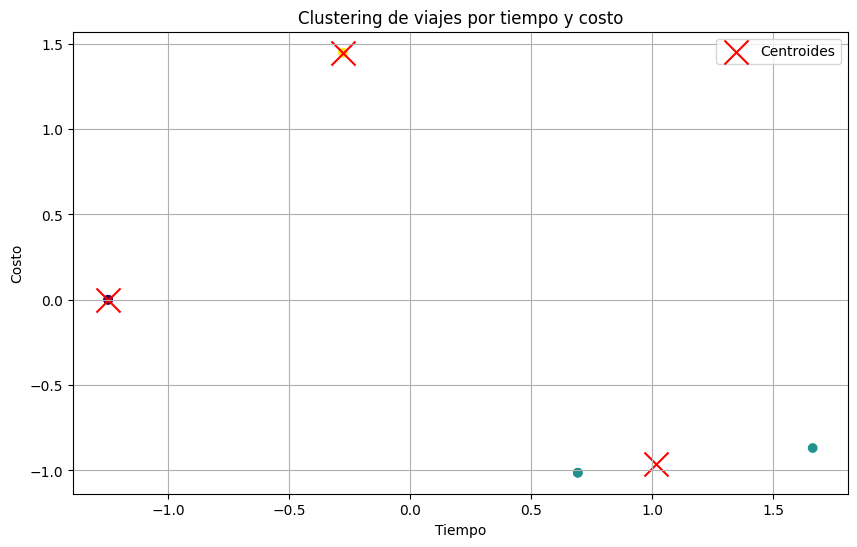

In [19]:
# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Clustering de viajes por tiempo y costo')
plt.legend()
plt.grid(True)
plt.show()